# Loading Data from Kshitij

In [1]:
# Loading the model data

paths = ['RDM_taskonomy_bonner50/autoencoder_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/class_1000_feedforward_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/class_places_feedforward_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/colorization_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/curvature_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/denoise_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/edge2d_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/edge3d_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/inpainting_whole_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/keypoint2d_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/keypoint3d_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/random_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/reshade_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/rgb2depth_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/rgb2mist_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/rgb2sfnorm_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/segment25d_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/segment2d_encoder_block4.mat', 
         'RDM_taskonomy_bonner50/segmentsemantic_encoder_block4.mat']




# Seperating into Groups
is2D = [1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0]
is3D = [0,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0,0,0]
isSm = [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0] 


paths_2D = ['RDM_taskonomy_bonner50/autoencoder_encoder_block4.mat',
            'RDM_taskonomy_bonner50/colorization_encoder_block4.mat',
            'RDM_taskonomy_bonner50/denoise_encoder_block4.mat',
            'RDM_taskonomy_bonner50/edge2d_encoder_block4.mat',
            'RDM_taskonomy_bonner50/inpainting_whole_encoder_block4.mat',
            'RDM_taskonomy_bonner50/keypoint2d_encoder_block4.mat',
            'RDM_taskonomy_bonner50/segment2d_encoder_block4.mat']

paths_3D = ['RDM_taskonomy_bonner50/curvature_encoder_block4.mat',
            'RDM_taskonomy_bonner50/edge3d_encoder_block4.mat',
            'RDM_taskonomy_bonner50/keypoint3d_encoder_block4.mat',
            'RDM_taskonomy_bonner50/reshade_encoder_block4.mat',
            'RDM_taskonomy_bonner50/rgb2depth_encoder_block4.mat',
            'RDM_taskonomy_bonner50/rgb2mist_encoder_block4.mat',
            'RDM_taskonomy_bonner50/rgb2sfnorm_encoder_block4.mat',
            'RDM_taskonomy_bonner50/segment25d_encoder_block4.mat']

paths_Sm = ['RDM_taskonomy_bonner50/class_1000_feedforward_encoder_block4.mat',
            'RDM_taskonomy_bonner50/class_places_feedforward_encoder_block4.mat',
            'RDM_taskonomy_bonner50/segmentsemantic_encoder_block4.mat']

paths_nv = ['C:/Users/Domenic/Documents/Repositories/Variance Partitioning Analysis/NAM_rdm.mat']


# Adding my own path
for i, path in enumerate(paths_2D):
    paths_2D[i] = r"C:/Users/Domenic/Documents/Repositories/Variance Partitioning Analysis/" + path
for i, path in enumerate(paths_3D):
    paths_3D[i] = r"C:/Users/Domenic/Documents/Repositories/Variance Partitioning Analysis/" + path
for i, path in enumerate(paths_Sm):
    paths_Sm[i] = r"C:/Users/Domenic/Documents/Repositories/Variance Partitioning Analysis/" + path



In [7]:
# Loading the dependent EEG data
eeg_path = r"C:/Users/Domenic/Documents/Repositories/Variance Partitioning Analysis/eeg_rdm/eeg_rdms_matlab_decoding_lt.npy"

In [11]:
from net2brain.evaluations.variance_partitioning_analysis import VPA

independent_variables = [paths_2D, paths_3D, paths_Sm, paths_nv]
variable_names = ["2D", "3D", "SM", "NV"]

VPA_eval = VPA(eeg_path, independent_variables, variable_names)
dataframe = VPA_eval.evaluate(average_models=False)



In [12]:
from net2brain.evaluations.plotting import Plotting

# Plotting with significance
plotter = Plotting(dataframe)


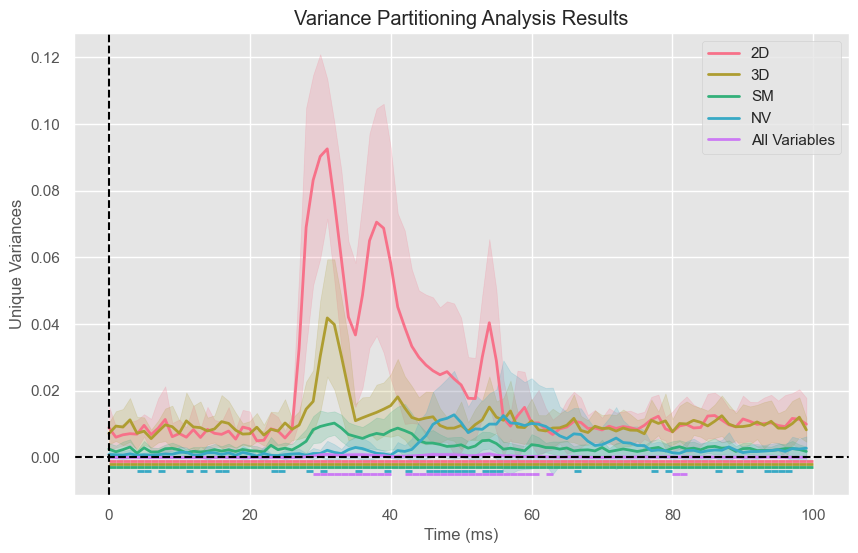

In [13]:
plotter.plotting_over_time(add_std=True)

# Creating Taskonomy RDMs by myself

In [ ]:
from net2brain.feature_extraction import FeatureExtractor
from pprint import pprint


models = ['autoencoding', 
         'curvature', 
         'colorization',
         'class_object', 
         'class_scene', 
         'denoising', 
         'euclidean', 
         'depth',
         'edge_occlusion', 
         'edge_texture', 
         'egomotion', 
         'fixated_pose', 
         'inpainting', 
         'jigsaw', 
         'keypoints2d', 
         'keypoints3d', 
         'nonfixated_pose', 
         'normal', 
         'point_matching', 
         'reshading',
         'room_layout', 
         'segment_unsup2d', 
         'segment_unsup25d', 
         'segment_semantic', 
         'vanishing_point']


stimuli_path = "C:/Users/Domenic/Documents/Repositories/Variance Partitioning Analysis/EEG_NAM/bonner_pnas2017/stimuli_data"



for model in models:

    fx_taskonomy = FeatureExtractor(model=model,
                                netset='taskonomy',
                                device='gpu')

    # Create features for the Scene Classification model
    fx_taskonomy.extract(dataset_path=stimuli_path,
                    save_format='npz',
                    save_path='Taskonomy_Models_' + model,
                    layers_to_extract=['layer4'])





In [ ]:
from net2brain.rdm_creation import RDMCreator

for model in models:

    # Create RDMs for the Scene Classification model
    creator_class = RDMCreator(feat_path="Taskonomy_Models_" + model,
                        save_path="Taskonomy_Models_RDMs_"+model)
    creator_class.create_rdms()

In [ ]:
# New path conversion dictionary


paths_2D = ['Taskonomy_Models_RDMs_autoencoding/layer4.npz',
            'Taskonomy_Models_RDMs_colorization/layer4.npz',
            'Taskonomy_Models_RDMs_denoising/layer4.npz',
            'Taskonomy_Models_RDMs_edge_texture/layer4.npz',
            'Taskonomy_Models_RDMs_inpainting/layer4.npz',
            'Taskonomy_Models_RDMs_keypoints2d/layer4.npz',
            'Taskonomy_Models_RDMs_segment_unsup2d/layer4.npz']

paths_3D = ['Taskonomy_Models_RDMs_curvature/layer4.npz',
            'Taskonomy_Models_RDMs_edge_occlusion/layer4.npz',
            'Taskonomy_Models_RDMs_keypoints3d/layer4.npz',
            'Taskonomy_Models_RDMs_reshading/layer4.npz',
            'Taskonomy_Models_RDMs_depth/layer4.npz',
            'Taskonomy_Models_RDMs_depth_euclidean/layer4.npz',
            'Taskonomy_Models_RDMs_normal/layer4.npz',
            'Taskonomy_Models_RDMs_segment_unsup25d/layer4.npz']

paths_Sm = ['Taskonomy_Models_RDMs_class_object/layer4.npz',
            'Taskonomy_Models_RDMs_class_scene/layer4.npz',
            'Taskonomy_Models_RDMs_segment_semantic/layer4.npz']

# Updating paths
base_path = r"C:/Users/Domenic/Documents/Repositories/Net2Brain/"


# Adding my own path
for i, path in enumerate(paths_2D):
    paths_2D[i] = r"C:/Users/Domenic/Documents/Repositories/Net2Brain/" + path
for i, path in enumerate(paths_3D):
    paths_3D[i] = r"C:/Users/Domenic/Documents/Repositories/Net2Brain/" + path
for i, path in enumerate(paths_Sm):
    paths_Sm[i] = r"C:/Users/Domenic/Documents/Repositories/Net2Brain/" + path


paths_nv = ['C:/Users/Domenic/Documents/Repositories/Variance Partitioning Analysis/NAM_rdm.mat']


# Loading the dependent EEG data
eeg_path = r"C:/Users/Domenic/Documents/Repositories/Variance Partitioning Analysis/eeg_rdm/eeg_rdms_matlab_decoding_lt.npy"


In [ ]:
from net2brain.evaluations.variance_partitioning_analysis import VPA

independent_variables = [paths_2D, paths_3D, paths_Sm, paths_nv]
variable_names = ["2D", "3D", "SM", "NV"]

VPA_eval = VPA(eeg_path, independent_variables, variable_names)
dataframe = VPA_eval.evaluate(average_models=False)



In [ ]:
from net2brain.evaluations.plotting import Plotting

# Plotting with significance
plotter = Plotting(dataframe)

plotter.plotting_over_time(add_std=True)
